In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

### Loading Data 

In [3]:
loan_data  = pd.read_csv("train_ctrUa4K.csv")
test_data = pd.read_csv("test_lAUu6dG.csv")
sample_submission=pd.read_csv("sample_submission_49d68Cx.csv")

In [4]:
test_data.shape

(367, 12)

In [5]:
loan_data.shape

(614, 13)

In [6]:
sample_submission.shape

(367, 2)

In [57]:
loan_data.tail(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,Female,Yes,one,Graduate,No,12000,0.0,496.0,360.0,one,Semiurban,Y
605,Male,Yes,zero,Not Graduate,No,2400,3800.0,128.0,180.0,one,Urban,N
606,Male,Yes,one,Graduate,No,3400,2500.0,173.0,360.0,one,Semiurban,Y
607,Male,Yes,two,Not Graduate,No,3987,1411.0,157.0,360.0,one,Rural,Y
608,Male,Yes,zero,Graduate,No,3232,1950.0,108.0,360.0,one,Rural,Y
609,Female,No,zero,Graduate,No,2900,0.0,71.0,360.0,one,Rural,Y
610,Male,Yes,three,Graduate,No,4106,0.0,40.0,180.0,one,Rural,Y
611,Male,Yes,one,Graduate,No,8072,240.0,253.0,360.0,one,Urban,Y
612,Male,Yes,two,Graduate,No,7583,0.0,187.0,360.0,one,Urban,Y
613,Female,No,zero,Graduate,Yes,4583,0.0,133.0,360.0,zero,Semiurban,N


In [8]:
test_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


### Removing unnecessary columns

In [9]:
loan_data.drop('Loan_ID', inplace=True, axis=1)
loan_data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [10]:
test_data.drop('Loan_ID', inplace=True, axis=1)
test_data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


### Data types of Columns

In [11]:
loan_data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
test_data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

### Null Values in Data

In [13]:
loan_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [15]:
test_data.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [16]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


### Data Cleaning 

 Replacing nan with mode for numerical and categorical

In [17]:
num_cols = loan_data.select_dtypes(include=np.number).columns
loan_data[num_cols] = loan_data[num_cols].fillna(loan_data[num_cols].median())
num_cols = test_data.select_dtypes(include=np.number).columns
test_data[num_cols] = test_data[num_cols].fillna(test_data[num_cols].median())

In [18]:
cat_cols = loan_data.select_dtypes(include = 'object').columns
loan_data[cat_cols] = loan_data[cat_cols].fillna(loan_data[cat_cols].median())
cat_cols = test_data.select_dtypes(include = 'object').columns
test_data[cat_cols] = test_data[cat_cols].fillna(test_data[cat_cols].median())

In [19]:
loan_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
test_data.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

Replacing NAN with most frequent

In [21]:
from sklearn.impute import SimpleImputer 

mode_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
mode_imputer = mode_imputer.fit(loan_data[['Gender']])
loan_data[['Gender']] = mode_imputer.transform(loan_data[['Gender']]).ravel()
mode_imputer = mode_imputer.fit(loan_data[['Married']])
loan_data[['Married']] = mode_imputer.transform(loan_data[['Married']]).ravel()
mode_imputer = mode_imputer.fit(loan_data[['Dependents']])
loan_data[['Dependents']] = mode_imputer.transform(loan_data[['Dependents']]).ravel()
mode_imputer = mode_imputer.fit(loan_data[['Self_Employed']])
loan_data[['Self_Employed']] = mode_imputer.transform(loan_data[['Self_Employed']]).ravel()

In [22]:
from sklearn.impute import SimpleImputer 

mode_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
mode_imputer = mode_imputer.fit(test_data[['Gender']])
test_data[['Gender']] = mode_imputer.transform(test_data[['Gender']]).ravel()
mode_imputer = mode_imputer.fit(test_data[['Married']])
test_data[['Married']] = mode_imputer.transform(test_data[['Married']]).ravel()
mode_imputer = mode_imputer.fit(test_data[['Dependents']])
test_data[['Dependents']] = mode_imputer.transform(test_data[['Dependents']]).ravel()
mode_imputer = mode_imputer.fit(test_data[['Self_Employed']])
test_data[['Self_Employed']] = mode_imputer.transform(test_data[['Self_Employed']]).ravel()

In [23]:
loan_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
loan_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
print(loan_data['Gender'].unique())
print(loan_data['Married'].unique())
print(loan_data['Dependents'].unique())
print(loan_data['Education'].unique())
print(loan_data['Self_Employed'].unique())
print(loan_data['Credit_History'].unique())

['Male' 'Female']
['No' 'Yes']
['0' '1' '2' '3+']
['Graduate' 'Not Graduate']
['No' 'Yes']
[1. 0.]


In [26]:
loan_data['Dependents'] =loan_data['Dependents'].replace(['3+'],'three')
print(loan_data['Dependents'].unique())
test_data['Dependents'] =test_data['Dependents'].replace(['3+'],'three')
print(test_data['Dependents'].unique())

['0' '1' '2' 'three']
['0' '1' '2' 'three']


In [27]:
loan_data['Dependents'] =loan_data['Dependents'].replace(['1'],'one')
print(loan_data['Dependents'].unique())
test_data['Dependents'] =test_data['Dependents'].replace(['1'],'one')
print(test_data['Dependents'].unique())

['0' 'one' '2' 'three']
['0' 'one' '2' 'three']


In [28]:
loan_data['Dependents'] =loan_data['Dependents'].replace(['2'],'two')
print(loan_data['Dependents'].unique())
test_data['Dependents'] =test_data['Dependents'].replace(['2'],'two')
print(test_data['Dependents'].unique())

['0' 'one' 'two' 'three']
['0' 'one' 'two' 'three']


In [29]:
loan_data['Dependents'] =loan_data['Dependents'].replace([1.],'zero')
print(loan_data['Dependents'].unique())
test_data['Dependents'] =test_data['Dependents'].replace([0.],'zero')
print(test_data['Dependents'].unique())

['zero' 'one' 'two' 'three']
['zero' 'one' 'two' 'three']


In [33]:
loan_data['Credit_History'] =loan_data['Credit_History'].replace([1.],"one")
loan_data['Credit_History'] =loan_data['Credit_History'].replace([0.],"zero")
print(loan_data['Credit_History'].unique())

['one' 'zero']


In [35]:
test_data['Credit_History'] =test_data['Credit_History'].replace([1.],"one")
test_data['Credit_History'] =test_data['Credit_History'].replace([0.],"zero")
print(test_data['Credit_History'].unique())

['one' 'zero']


### Loan Status (yi)

In [36]:
y=loan_data.Loan_Status.value_counts()
print(y)

Y    422
N    192
Name: Loan_Status, dtype: int64


In [37]:
y_t=y[1]+y[0]
y_1=(y[1]/y_t)*100
y_0=(y[0]/y_t)*100
print("percentage of loan status is 0:",y_0)
print("percentage of loan status is 1:",y_1)

percentage of loan status is 0: 68.72964169381108
percentage of loan status is 1: 31.27035830618892


### Data visualization

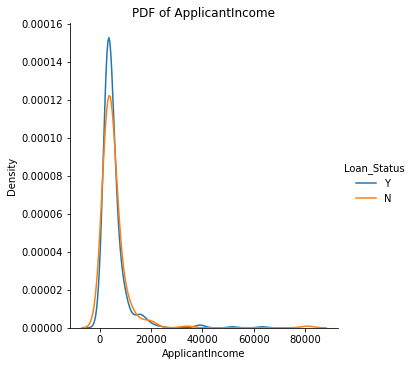

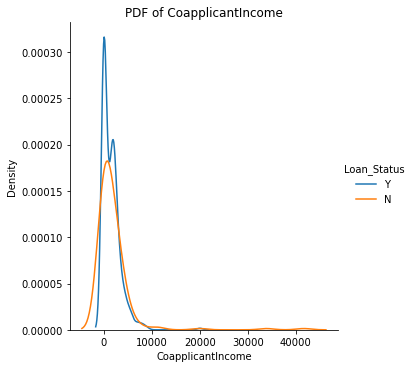

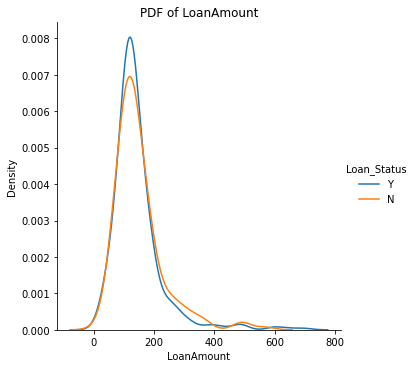

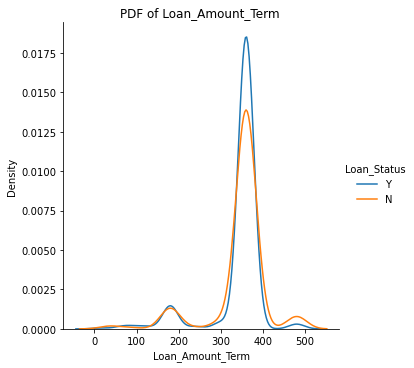

In [38]:
g = sns.FacetGrid(loan_data, hue="Loan_Status", height=5)
g.map(sns.kdeplot, "ApplicantIncome").add_legend()
plt.title("PDF of ApplicantIncome")
plt.show()

h = sns.FacetGrid(loan_data, hue="Loan_Status", height=5)
h.map(sns.kdeplot, "CoapplicantIncome").add_legend()
plt.title("PDF of CoapplicantIncome")
plt.show()

I = sns.FacetGrid(loan_data, hue="Loan_Status", height=5)
I.map(sns.kdeplot, "LoanAmount").add_legend()
plt.title("PDF of LoanAmount")
plt.show()

g = sns.FacetGrid(loan_data, hue="Loan_Status", height=5)
g.map(sns.kdeplot, "Loan_Amount_Term").add_legend()
plt.title("PDF of Loan_Amount_Term ")
plt.show()


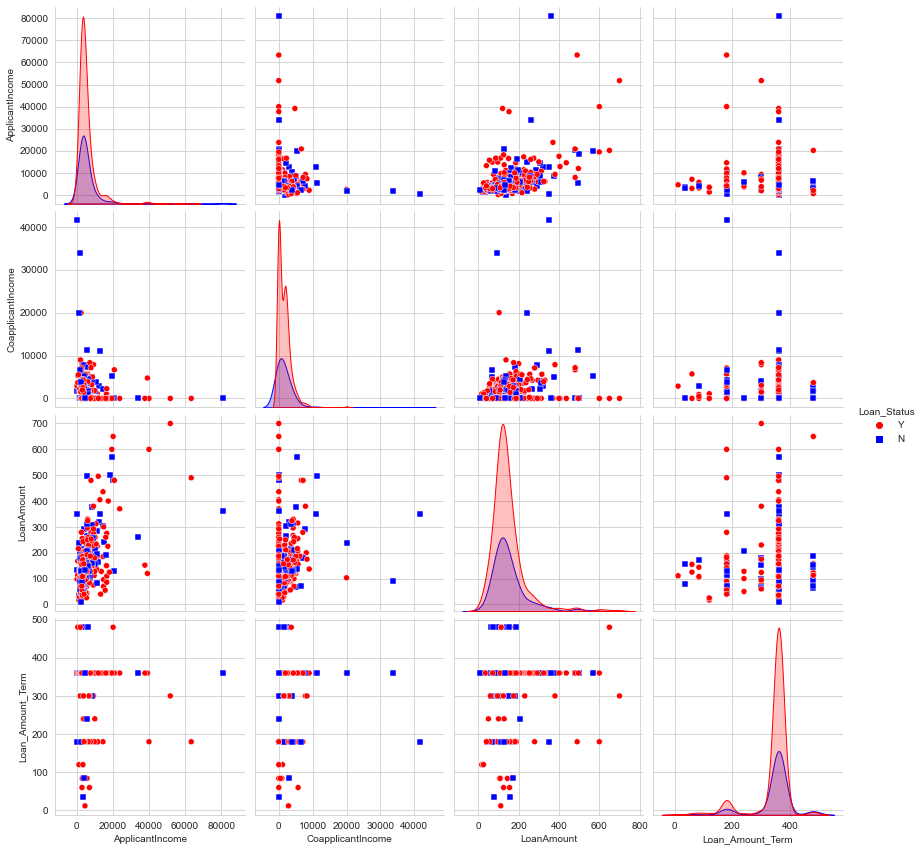

In [39]:
plt.close();
sns.set_style("whitegrid");

sns.pairplot(loan_data, hue="Loan_Status",markers=["o", "s"],palette=["r","b"],height=3);
plt.show()

## readings:
we can see Credit_History pdf is seem to be good and the Pair-plot with other like ApplicantIncome,CoapplicantIncome,LoanAmount are also looks good 


In [40]:
loan_data.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

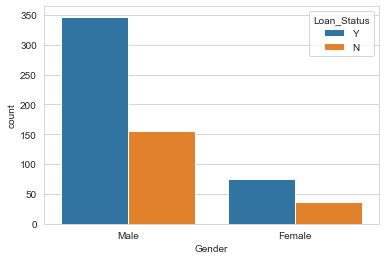

In [41]:
sns.countplot(x='Gender',hue='Loan_Status',data=loan_data)

### reading 
chances of getting loan is more for males when compare to females 

<AxesSubplot:xlabel='Married', ylabel='count'>

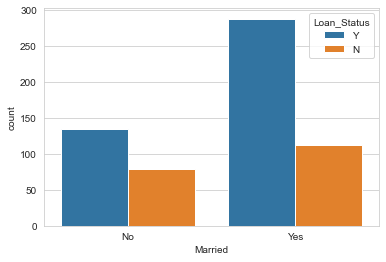

In [42]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_data)

### reading
chances of getting loan is more for Married people when compare to the who are not 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

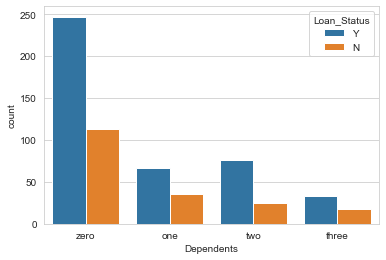

In [43]:
sns.countplot(x='Dependents',hue='Loan_Status',data=loan_data)

### reading 
chances of getting loan is more for people who having less dependents

<AxesSubplot:xlabel='Education', ylabel='count'>

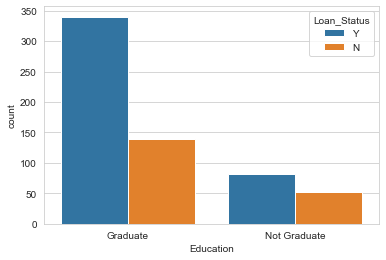

In [44]:
sns.countplot(x='Education',hue='Loan_Status',data=loan_data)

### reading 
chances of getting loan is more for graduates

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

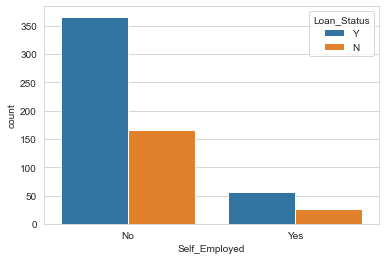

In [45]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_data)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

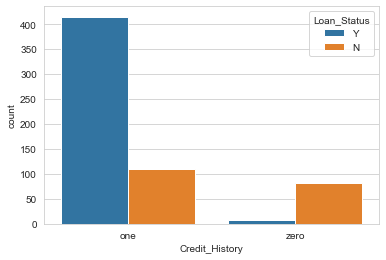

In [46]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=loan_data)

### reading 
chances of getting loan is more for have credit history is 1

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

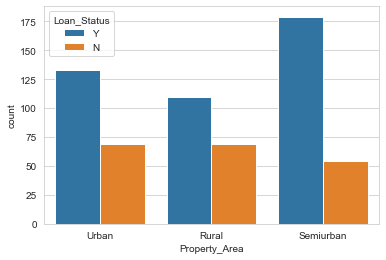

In [47]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=loan_data)

### reading 
chances of getting loan is more for semi urban and urban 

### Plotting correlation

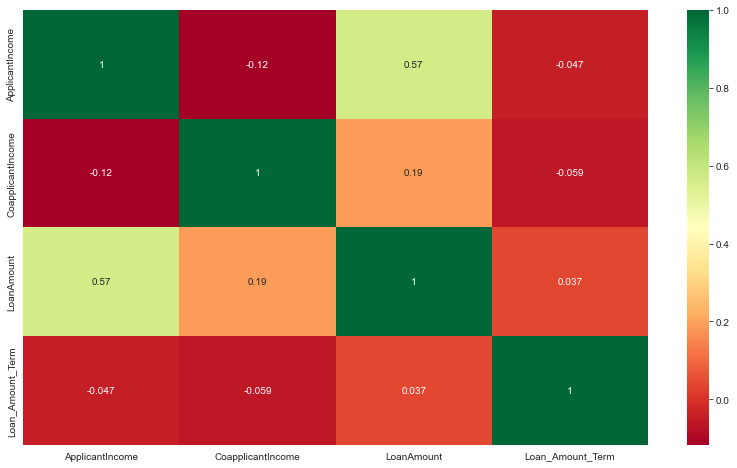

In [48]:
corrmat= loan_data.corr()
plt.figure(figsize=(14,8))

#To plot heatmap
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

### Test and Train Split

In [58]:
from sklearn.model_selection import train_test_split
y_train= loan_data["Loan_Status"]
X_train=loan_data.drop(["Loan_Status"],axis = 1)
X_test=test_data
print("shape of X_train:",X_train.shape)
print("shape of X_test:",X_test.shape)
print("shape of y_train:",y_train.shape)

shape of X_train: (614, 11)
shape of X_test: (367, 11)
shape of y_train: (614,)


## Data preprocessing

### one-hot encoding.

In [59]:
Gender_vectorizer = CountVectorizer()
train_Gender_feature_onehotCoding = Gender_vectorizer.fit_transform(X_train['Gender'])
test_Gender_feature_onehotCoding = Gender_vectorizer.transform(X_test['Gender'])
print(train_Gender_feature_onehotCoding.shape)
print(test_Gender_feature_onehotCoding.shape)

(614, 2)
(367, 2)


In [60]:
Married_vectorizer = CountVectorizer()
train_Married_feature_onehotCoding = Married_vectorizer.fit_transform(X_train['Married'])
test_Married_feature_onehotCoding = Married_vectorizer.transform(X_test['Married'])
print(train_Married_feature_onehotCoding.shape)
print(test_Married_feature_onehotCoding.shape)

(614, 2)
(367, 2)


In [61]:
Education_vectorizer = CountVectorizer()
train_Education_feature_onehotCoding = Education_vectorizer.fit_transform(X_train['Education'])
test_Education_feature_onehotCoding = Education_vectorizer.transform(X_test['Education'])
print(train_Education_feature_onehotCoding.shape)
print(test_Education_feature_onehotCoding.shape)

(614, 2)
(367, 2)


In [62]:
Self_Employed_vectorizer = CountVectorizer()
train_Self_Employed_feature_onehotCoding = Self_Employed_vectorizer.fit_transform(X_train['Self_Employed'])
test_Self_Employed_feature_onehotCoding = Self_Employed_vectorizer.transform(X_test['Self_Employed'])
print(train_Self_Employed_feature_onehotCoding.shape)
print(test_Self_Employed_feature_onehotCoding.shape)

(614, 2)
(367, 2)


In [63]:
Property_Area_vectorizer = CountVectorizer()
train_Property_Area_feature_onehotCoding = Property_Area_vectorizer.fit_transform(X_train['Property_Area'])
test_Property_Area_feature_onehotCoding = Property_Area_vectorizer.transform(X_test['Property_Area'])
print(train_Property_Area_feature_onehotCoding.shape)
print(test_Property_Area_feature_onehotCoding.shape)

(614, 3)
(367, 3)


In [64]:
Dependents_vectorizer = CountVectorizer()
train_Dependents_feature_onehotCoding = Dependents_vectorizer.fit_transform(X_train['Dependents'])
test_Dependents_feature_onehotCoding = Dependents_vectorizer.transform(X_test['Dependents'])
print(train_Dependents_feature_onehotCoding.shape)
print(test_Dependents_feature_onehotCoding.shape)

(614, 4)
(367, 4)


In [66]:
Credit_History_vectorizer = CountVectorizer()
train_Credit_History_feature_onehotCoding = Credit_History_vectorizer.fit_transform(X_train['Credit_History'])
test_Credit_History_feature_onehotCoding = Credit_History_vectorizer.transform(X_test['Credit_History'])
print(train_Credit_History_feature_onehotCoding.shape)
print(test_Credit_History_feature_onehotCoding.shape)

(614, 2)
(367, 2)


### applying StandardScaler for numerical 

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train['ApplicantIncome'].values.reshape(-1, 1))
train_ApplicantIncome_feature_StandardScaler=scaler.transform(X_train['ApplicantIncome'].values.reshape(-1, 1) )
test_ApplicantIncome_feature_StandardScaler=scaler.transform(X_test['ApplicantIncome'].values.reshape(-1, 1) )
print(train_ApplicantIncome_feature_StandardScaler.shape)
print(test_ApplicantIncome_feature_StandardScaler.shape)

(614, 1)
(367, 1)


In [68]:
scaler = StandardScaler()
scaler.fit(X_train['CoapplicantIncome'].values.reshape(-1, 1))
train_CoapplicantIncome_feature_StandardScaler=scaler.transform(X_train['CoapplicantIncome'].values.reshape(-1, 1) )
test_CoapplicantIncome_feature_StandardScaler=scaler.transform(X_test['CoapplicantIncome'].values.reshape(-1, 1) )
print(train_CoapplicantIncome_feature_StandardScaler.shape)
print(test_CoapplicantIncome_feature_StandardScaler.shape)

(614, 1)
(367, 1)


In [69]:
scaler = StandardScaler()
scaler.fit(X_train['LoanAmount'].values.reshape(-1, 1))
train_LoanAmount_feature_StandardScaler=scaler.transform(X_train['LoanAmount'].values.reshape(-1, 1) )
test_LoanAmount_feature_StandardScaler=scaler.transform(X_test['LoanAmount'].values.reshape(-1, 1) )
print(train_LoanAmount_feature_StandardScaler.shape)
print(test_LoanAmount_feature_StandardScaler.shape)

(614, 1)
(367, 1)


In [70]:
print(X_train['Loan_Amount_Term'].head())
scaler = StandardScaler()
scaler.fit(X_train['Loan_Amount_Term'].values.reshape(-1, 1))
train_Loan_Amount_Term_feature_StandardScaler=scaler.transform(X_train['Loan_Amount_Term'].values.reshape(-1, 1) )
test_Loan_Amount_Term_feature_StandardScaler=scaler.transform(X_test['Loan_Amount_Term'].values.reshape(-1, 1) )

print(train_Loan_Amount_Term_feature_StandardScaler.shape)
print(test_Loan_Amount_Term_feature_StandardScaler.shape)

0    360.0
1    360.0
2    360.0
3    360.0
4    360.0
Name: Loan_Amount_Term, dtype: float64
(614, 1)
(367, 1)


### Concatinating all the features

In [71]:
from scipy.sparse import hstack


X_train_pp= hstack((train_Credit_History_feature_onehotCoding,train_Dependents_feature_onehotCoding,train_Loan_Amount_Term_feature_StandardScaler,train_LoanAmount_feature_StandardScaler,train_CoapplicantIncome_feature_StandardScaler,train_ApplicantIncome_feature_StandardScaler,train_Gender_feature_onehotCoding,train_Married_feature_onehotCoding,train_Education_feature_onehotCoding,train_Self_Employed_feature_onehotCoding,train_Property_Area_feature_onehotCoding)).tocsr()
X_test_pp = hstack((test_Credit_History_feature_onehotCoding,test_Dependents_feature_onehotCoding,test_Loan_Amount_Term_feature_StandardScaler,test_LoanAmount_feature_StandardScaler,test_CoapplicantIncome_feature_StandardScaler,test_ApplicantIncome_feature_StandardScaler,test_Gender_feature_onehotCoding,test_Married_feature_onehotCoding,test_Education_feature_onehotCoding,test_Self_Employed_feature_onehotCoding,test_Property_Area_feature_onehotCoding)).tocsr()

print("Final Data matrix")
print(X_train_pp.shape, y_train.shape)
print(X_test_pp.shape)
print("="*100)

Final Data matrix
(614, 21) (614,)
(367, 21)


### KNN-Classifier

In [83]:
knn = KNeighborsClassifier()
grid_params = { 'n_neighbors' : [5,7,9,11,13,15,20,25,30,35,40,50]}
               #'weights' : ['uniform','distance'],
               #'metric' : ['minkowski','euclidean','manhattan']}
gs_knn = GridSearchCV(knn, grid_params, verbose = 1, cv=3, n_jobs = -1)
knn = KNeighborsClassifier()
g_res = gs_knn.fit(X_train_pp, y_train)
g_res.best_params_


Fitting 3 folds for each of 12 candidates, totalling 36 fits


{'n_neighbors': 9}

In [84]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train_pp, y_train)

KNeighborsClassifier(n_neighbors=9)

In [85]:
from sklearn import metrics
y_hat = knn.predict(X_train_pp)
y_knn = knn.predict(X_test_pp)
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))


Training set accuracy:  0.7947882736156352


In [86]:
sample_submission_knn=sample_submission

sample_submission_knn["Loan_Status"]=y_knn
y=sample_submission_knn.Loan_Status.value_counts()
print(y)

sample_submission_knn.to_csv('knn.csv')

Y    310
N     57
Name: Loan_Status, dtype: int64


### From analyticsvidhya.com contest
https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#SolutionChecker

In [ ]:
print('Test set accuracy: 0.743055555555556')

### Logistic Regression

In [ ]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-4,4,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear']}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_pp, y_train)
logreg_cv.best_params_

In [ ]:
logreg_1=LogisticRegression(C= 0.002154434690031882,penalty='l2',solver='liblinear')
logreg_1.fit(X_train_pp, y_train)

In [ ]:
y_hat = logreg_1.predict(X_train_pp)
y_logreg_1 = logreg_1.predict(X_test_pp)
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))

In [ ]:
sample_submission_LR=sample_submission

sample_submission_LR["Loan_Status"]=y_logreg_1
y=sample_submission_LR.Loan_Status.value_counts()
print(y)

sample_submission_knn.to_csv('LR.csv')

### support vector machine

In [ ]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True)
grid.fit(X_train_pp, y_train)
grid.best_params_


In [ ]:
svm=SVC(C =10,gamma =0.01,kernel='rbf')
svm.fit(X_train_pp, y_train)
y_hat = svm.predict(X_train_pp)
y_svm_1 = svm.predict(X_test_pp)
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))



In [ ]:
sample_submission_SVM=sample_submission

sample_submission_SVM["Loan_Status"]=y_svm_1
y1=sample_submission_SVM.Loan_Status.value_counts()
print(y1)

sample_submission_SVM.to_csv('SVM.csv')

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': [2,3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params,n_jobs=-1,scoring = "neg_log_loss")
grid_search.fit(X_train_pp, y_train)
grid_search.best_params_

In [ ]:
dt = DecisionTreeClassifier(random_state=42,criterion='gini',max_depth= 2,min_samples_leaf=50)
dt.fit(X_train_pp, y_train)
y_hat_1 = dt.predict(X_train_pp)
y_dt_1 = dt.predict(X_test_pp)
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat_1))


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    #'bootstrap': [True],
    #'min_samples_leaf': [3, 4, 5],
    #'min_samples_split': [8, 10, 17],
    'n_estimators': [10,20,50,80,100, 200, 300,500,1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid searc h model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          n_jobs = -1)
grid_search.fit(X_train_pp, y_train)
grid_search.best_params_

In [ ]:
rf = RandomForestClassifier(bootstrap=True,min_samples_leaf=3,min_samples_split=8,n_estimators=200)
rf.fit(X_train_pp, y_train)
y_hat_1 = rf.predict(X_train_pp)
y_rf_1 = rf.predict(X_test_pp)
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat_1))

In [ ]:
sample_submission_RF=sample_submission

sample_submission_RF["Loan_Status"]=y_rf_1
y_rf=sample_submission_RF.Loan_Status.value_counts()
print(y_rf)

sample_submission_RF.to_csv('RF.csv')

### xgboost

In [ ]:
from xgboost import XGBClassifier
clf_GBDT = XGBClassifier(random_state=1)
parameters = {
              'learning_rate': [0.01,0.03,0.1,0.15,0.2,0.15, 0.2],
              'max_depth': [11,12,13,14,15,16],
              'n_estimators': [25,50,75,100,115,150,]}
xgb_model1 = GridSearchCV(clf_GBDT , parameters, scoring='roc_auc',return_train_score=True,n_jobs=-1)
xgb_model1.fit(X_train_pp, y_train)

In [ ]:
xgb_model1.best_params_

In [ ]:
from xgboost import XGBClassifier
from sklearn import metrics
xgb_model =XGBClassifier(random_state=1,learning_rate=0.03,max_depth= 12,n_estimators= 75)
xgb_model .fit(X_train_pp, y_train)
y_hat = xgb_model.predict(X_train_pp)
y_dt_1 = xgb_model.predict(X_test_pp)
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))


In [ ]:
sample_submission_xgb=sample_submission

sample_submission_xgb["Loan_Status"]=y_dt_1
y_xgb=sample_submission_xgb.Loan_Status.value_counts()
print(y_xgb)

sample_submission_xgb.to_csv('xbg1.csv')

In [ ]:
xbg=pd.read_csv("xbg1.csv")
y_xgb=xbg.Loan_Status.value_counts()
print(y_xgb)
